# Data Analysis of Top Spotify Songs from 2010-2019

## Setup

### Import Packages

In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Note: I'm using seaborn because it integrates well with pandas 
# and makes it easier to quickly plot data than matplotlib.
# It converts dataframes to code that matplotlib can understand.

### Ensure Minimum Requirements Are Met

In [2]:
import sys
# sys.version

# Python  interpreter version ≥3.7 is required
assert sys.version_info >= (3, 7)

# matplotlib.pyplot
assert mpl.__version__ >= "3.3"

# numpy ≥1.19 is required
assert np.__version__ >= "1.19"

# pandas ≥1.1 is required
assert pd.__version__ >= "1.1"

# seaborn ≥0.11 is required
assert sns.__version__ >= "0.11"

## Import Data

### Create a DataFrame from .csv files

In [3]:
# Import all csv files from spotifysongscsvs/
# Note: I'm using os.path.join() here to create the path
# value in case files are loading on Windows.
joined_files = os.path.join("spotifysongscsvs", "*.csv")

# Create List of the files
joined_list = glob.glob(joined_files)

# Concatenate the files together
all_top_songs = pd.concat((pd.read_csv(f) for f in joined_list), ignore_index=True)

# Drop the first column (old index) and use the generated index
all_top_songs.drop(all_top_songs.columns[0], axis=1, inplace=True)

### Data Understanding

* title = song's title
* artist = song's artist
* top genre = the genre of the track
* year = song's year in the billboard
* bpm = beats per minute (tempo)
* nrgy = energy, the higher the value the more energetic the song
* dnce = danceability, the higher the value the easier it is to dance to
* db = loudness, the higher the value the louder the song
* live = the higher the value the more likely the song is a live recording
* val = valence, the higher the value the more positive the mood
* dur = duration of the song
* acous = acousticness, the higher the value the more acoustic the song is
* spch = speechiness, the higher the value the more spoken word the song contains
* pop = popularity, the higher the value the more popular the song is

### Clean The Data

In [4]:
# Convert the 'year' column to a datetime object.
# Not really needed but feels like a good idea.
# This seem to help plots with year as the x-axis show all year labels.
all_top_songs.year = pd.to_datetime(all_top_songs.year, format='%Y')

# NOTE: The 'year' column is formatted as '2019-01-01' 
# instead of just the year as might be expected.
display(all_top_songs.head())

# Check columns types
# Make sure specific columns are an integer
all_top_songs.dtypes

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Memories,Maroon 5,pop,2019-01-01,91,32,76,-7,8,57,189,84,5,99
1,Lose You To Love Me,Selena Gomez,dance pop,2019-01-01,102,34,51,-9,21,9,206,58,4,97
2,Someone You Loved,Lewis Capaldi,pop,2019-01-01,110,41,50,-6,11,45,182,75,3,96
3,Señorita,Shawn Mendes,canadian pop,2019-01-01,117,54,76,-6,9,75,191,4,3,95
4,How Do You Sleep?,Sam Smith,pop,2019-01-01,111,68,48,-5,8,35,202,15,9,93


title                object
artist               object
top genre            object
year         datetime64[ns]
bpm                   int64
nrgy                  int64
dnce                  int64
dB                    int64
live                  int64
val                   int64
dur                   int64
acous                 int64
spch                  int64
pop                   int64
dtype: object

### Investigate the Data

In [5]:
# print(all_top_songs)
# all_top_songs.head()
# all_top_songs.shape
# all_top_songs.info()
# Using display() here to display more than one output in a cell
display(all_top_songs.describe(include='all', datetime_is_numeric=True).T)
all_top_songs.head()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
title,603,584,All I Ask,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist,603,184,Katy Perry,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top genre,603,50,dance pop,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,603,NaN,NaN,NaN,2014-08-05 03:06:16.119402752,2010-01-01 00:00:00,2013-01-01 00:00:00,2015-01-01 00:00:00,2017-01-01 00:00:00,2019-01-01 00:00:00,NaN
bpm,603.0,NaN,NaN,NaN,118.545605,0.0,100.0,120.0,129.0,206.0,24.795358
nrgy,603.0,NaN,NaN,NaN,70.504146,0.0,61.0,74.0,82.0,98.0,16.310664
dnce,603.0,NaN,NaN,NaN,64.379768,0.0,57.0,66.0,73.0,97.0,13.378718
dB,603.0,NaN,NaN,NaN,-5.578773,-60.0,-6.0,-5.0,-4.0,-2.0,2.79802
live,603.0,NaN,NaN,NaN,17.774461,0.0,9.0,12.0,24.0,74.0,13.102543
val,603.0,NaN,NaN,NaN,52.225539,0.0,35.0,52.0,69.0,98.0,22.51302


,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Memories,Maroon 5,pop,2019-01-01,91,32,76,-7,8,57,189,84,5,99
1,Lose You To Love Me,Selena Gomez,dance pop,2019-01-01,102,34,51,-9,21,9,206,58,4,97
2,Someone You Loved,Lewis Capaldi,pop,2019-01-01,110,41,50,-6,11,45,182,75,3,96
3,Señorita,Shawn Mendes,canadian pop,2019-01-01,117,54,76,-6,9,75,191,4,3,95
4,How Do You Sleep?,Sam Smith,pop,2019-01-01,111,68,48,-5,8,35,202,15,9,93


### Check memory usage

In [6]:
all_top_songs.memory_usage(deep=True)
# 'artist' (184 uniques) and 'top genre' (50 uniques) might be candidates 
# for using the Categorical dtype.

Index          128
title        46034
artist       41032
top genre    39934
year          4824
bpm           4824
nrgy          4824
dnce          4824
dB            4824
live          4824
val           4824
dur           4824
acous         4824
spch          4824
pop           4824
dtype: int64

In [7]:
# NOTE: It can be tricky working with categorical data in pandas 
# and I went down a couple rabbit holes trying to get it to work.
# I'm going to leave it as is for now.
# This is not a huge dataset so it's not a big deal. 
# References:
# https://pandas.pydata.org/docs/user_guide/categorical.html
# https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a
# all_top_songs['artist'] = all_top_songs['artist'].astype('category')
# all_top_songs['top genre'] = all_top_songs['top genre'].astype('category')
# all_top_songs.memory_usage(deep=True)
# Optimizations:
# artist from 41032 to 17911 (~41%)
# top genre from 39934 to 6129 (~15%)
#
# In the future, if optimizing and using categorical data, consider using catplot().
# REF: https://seaborn.pydata.org/generated/seaborn.catplot.html

### Backup Data to CSV File

In [8]:
# Export the combined data DataFrame to a csv file
all_top_songs.to_csv("top_spotify_songs.csv", index=False)

## Define Chart Theme

In [9]:
sns.set_theme(
    context='notebook', # 'paper', 'notebook', 'talk', 'poster'
    style='whitegrid', 
    palette=sns.color_palette('plasma', 10),
    font='serif', # 'sans-serif', 'serif', 'cursive', 'fantasy', or 'monospace'
    font_scale=1.2,
    rc = {
        'grid.linestyle': (0, (1, 3)),
        'axes.titlesize': 24,
        'axes.labelsize': 20,
        'xtick.labelsize': 16,
        # Make the title bold
        'axes.titleweight': 'bold',
        # Add spacing between the title and the plot
        'axes.titlepad': 20,
        # Center the title in generated graphics
        'axes.titlelocation': 'center',
    })

# Get colors from the plasma palette with 10 stops (0-9) for more customizability
palette = sns.color_palette('plasma', as_cmap=False, n_colors=10)
# Create a transparent color palette based on palette
transparent_palette = [(*color, 0.25) for color in palette]

# Set some plot style defaults
plt.rcParams['figure.figsize'] = (12, 10)

# Avoid plotting blurry images
# REF: https://towardsdatascience.com/7-setups-you-should-include-at-the-beginning-of-a-data-science-project-8232ab10a1ec
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina' # or 'svg'
plt.rcParams['figure.dpi'] = 72 # 100 and higher looks best, but render big on screen

## Data Analysis

### 1. What is the most popular song in the dataset?

Data Fields Used:

* top genre = the genre of the track
* pop = popularity, the higher the value the more popular the song is
* title = song's title
* artist = song's artist

To get the most popular song I've sorted all songs by popularity based on the `pop` column value with highest value first then get the first most which is the most popular song in the dataset.

To visualize the popularity of the top 10 songs, I've created a bar chart showing their rank in popularity which leads to showing Memories by Maroon 5 being the top most popular song in the dataset.

Note: This result does not consider the `top genre` column with `pop` values which might be confused with the `pop` column with popularity values.

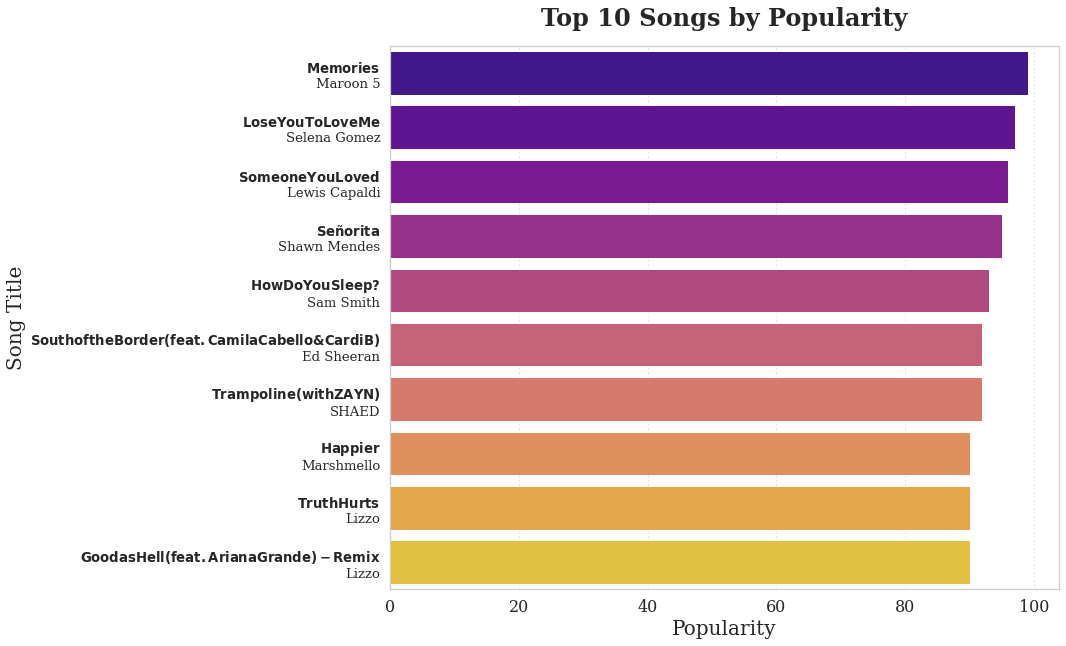

In [10]:
# Get top 10 pop songs and sort by popularity
most_popular_song = all_top_songs.sort_values(by='pop', ascending=False).head(1)
top_10_most_popular_songs = all_top_songs.sort_values(by='pop', ascending=False).head(10)

# Plot the top 10 songs with most popular on top
sns.barplot(
    data=top_10_most_popular_songs, 
    x='pop', 
    y='title'
)

# On the y-axis ticks include both the title of the song and the artist.
# TODO: Bold the title without spaces being stripped (get 'textbf' to work!)
plt.yticks(range(10), "$\\bf{" + top_10_most_popular_songs['title'].replace(' ', '\\ ') + "}$" + '\n' + top_10_most_popular_songs['artist'])
plt.title('Top 10 Songs by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Song Title')
plt.show()

> The most Pop popular song in the dataset is: Memories by Maroon 5

### 2. What artist has the most songs in the dataset?

Data Fields Used:

* artist = song's artist
* title = song's title

Here I create a new DataFrame containing all `artist` values and the number of songs they have in the dataset. Then I sort the DataFrame by the number of songs and the first row is the artist with the most songs.

I then plotted the `top_10_artists` data in a `barplot` chart which visually shows the rank of artists leading to answering the question: The artist with the most songs in the dataset is Katy Perry with 17 songs.

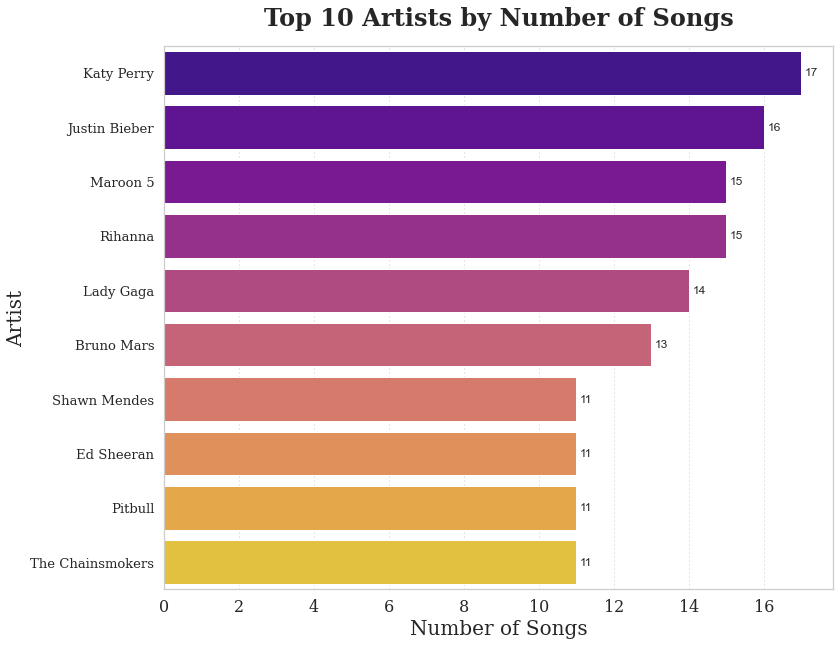

In [11]:
# Get the top 10 artists based on total number of songs per artist
top_10_artists = all_top_songs.groupby('artist')['title'].count().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

# Plot the top 10 artists with most songs
ax = sns.barplot(
    data=top_10_artists, 
    x='count', 
    y='artist', 
    palette='plasma'
)

# Label each bar
for b in ax.patches:
  height = b.get_height() # height of each horizontal bar is the same
  width = b.get_width() # width of bar is the value of the bar
  # adding text to each bar
  ax.text(
    x = width + .1, # x-coordinate position of data label, padded 3 to right of bar
    y = b.get_y() + (height / 2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center', # sets vertical alignment (va) to center
    fontsize=12, # Make font size smaller so it fits better
    family='sans-serif', # Looks a little cleaner for small font sizes
  )

plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

### 3. What is the most popular genre of music in the dataset?

Data Fields Used:

* top genre = the genre of the track
* pop = popularity, the higher the value the more popular the song is

To get the most popular genre, I first group all songs by their `top genre` value, then sum their `pop` (popularity) values and sort the results from highest to lowest which leads to finding the first genre listed of "Dance Pop" is the most popular genre in the dataset.

To visualize the popularity of each of the top 10 genres, I've created a bar chart showing the rank by popularity with the first at top being the most popular.

Note: These results are similar to the results in question 7: Which genre has the highest energy score?

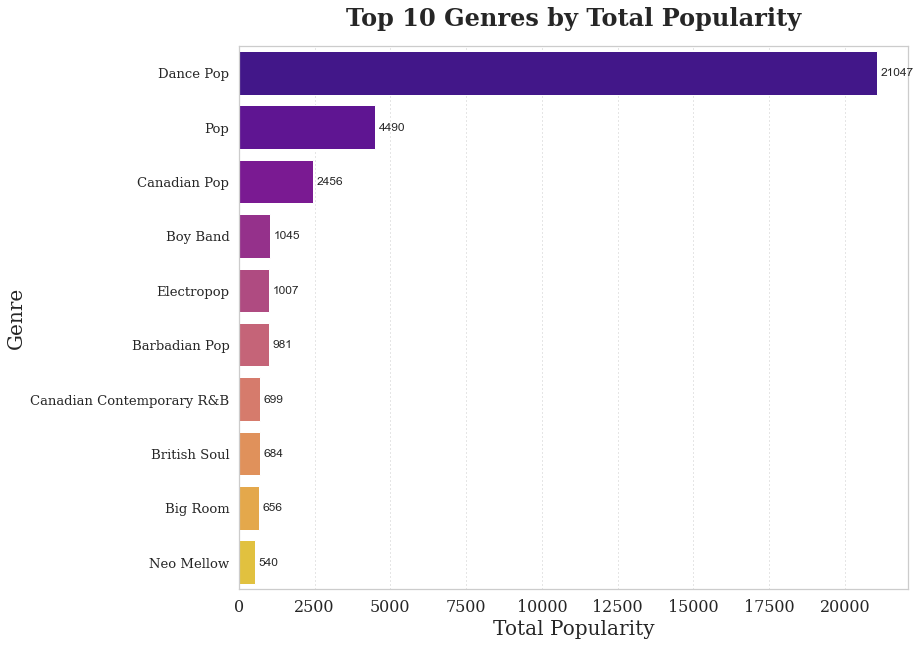

In [12]:
top_10_genres_by_popularity = all_top_songs.groupby("top genre")["pop"].sum().sort_values(ascending=False).head(10)

# Make index values uppercase so labels are easier to read
top_10_genres_by_popularity.index = top_10_genres_by_popularity.index.str.title()

# Plot the top 10 genres with most popular songs
ax = sns.barplot(
    x=top_10_genres_by_popularity.values, 
    y=top_10_genres_by_popularity.index,
    orient="h", 
    palette="plasma",
)

# Label each bar
for b in ax.patches:
  height = b.get_height() # height of each horizontal bar is the same
  width = b.get_width() # width of bar is the value of the bar
  # adding text to each bar
  ax.text(
    x = width + 120, # x-coordinate position of data label, padded 3 to right of bar
    y = b.get_y() + (height / 2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center', # sets vertical alignment (va) to center
    fontsize=12, # Make font size smaller so it fits better
    family='sans-serif', # Looks a little cleaner for small font sizes
  )

plt.title('Top 10 Genres by Total Popularity')
plt.xlabel('Total Popularity')
plt.ylabel('Genre')
plt.show()

### 4. Are there any songs in the dataset more than once?

Data Fields Used:

* title = song's title
* artist = song's artist

Here I first create a new DataFrame with the `title` and `artist` of all unique songs and no duplicates. Then I calculate the difference between the original dataset and the new dataset. If the difference is 0, then there are no duplicates. If the difference is greater than 0, then there are duplicates.

Based on this calculation, there are 16 duplicates in the dataset.

In [13]:
# Create df of duplicate song title, artist combinations
unique_songs = all_top_songs[['title', 'artist']].drop_duplicates()

# Subtract the number of unique songs from the total number of songs
number_of_repeated_songs = len(all_top_songs) - len(unique_songs)

# Print the number of repeated songs
number_of_repeated_songs

16

### 5. Is there a relationship between popularity and danceability?

Data Fields Used:

* dnce = danceability, the higher the value the easier it is to dance to
* pop = popularity, the higher the value the more popular the song is
* year = (optional) song's year in the billboard
* bpm = (optional) beats per minute (tempo)

For this question, I've created a scatter plot that visually shows the Popularity on the x-axis and the Danceability on the y-axis. Analyzing this data shows that there is a relationship between popularity and danceability. Both have the most values between 60 and 80 which leads to the conclusion - more popular songs also tend to be more danceable.

Note: The correlation doesn't imply causation. In other words, just because the Danceability value is higher doesn't mean the Popularity value will be higher. There are other factors besides Danceability that can be affecting the Popularity value.

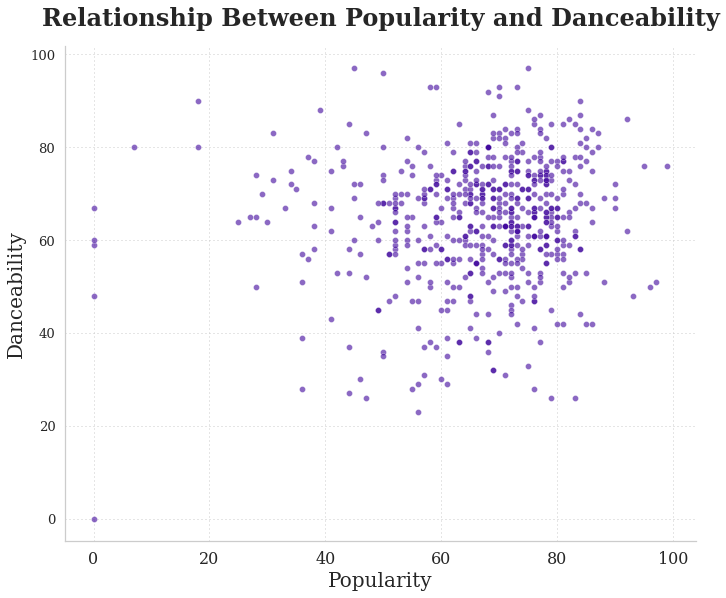

The correlation between Popularity and Danceability is 0.116054444614421


In [14]:
sns.relplot(
    data=all_top_songs,
    x="pop",
    y="dnce",
    palette='plasma',
    height=8, 
    aspect=1.25,
    alpha=0.6, # Make the points transparent so overlapping points are visible
    # Optional display values
    # hue="year", # Make each year a different color
    # size="bpm", # Make the size of the point represent the bpm
    # sizes=(10, 200), # Set the min and max size of the points
    # col="year", # This creates separate plots (facets) for each year
    # style="year", # For accessibility make each year a different shape
)

plt.title('Relationship Between Popularity and Danceability')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.show()

# Cross check the correlation
# TODO: Need to add note on how to interpret this value.
corr_pop_dnce_value = all_top_songs['pop'].corr(all_top_songs['dnce'])
print(f'The correlation between Popularity and Danceability is {corr_pop_dnce_value}')

### 6. Does having a higher bpm lead to having a higher energy score?

Data Fields Used:

* bpm = beats per minute (tempo)
* nrgy = energy, the higher the value the more energetic the song

To answer this question, I've created a joint plot that shows the relationship between `bpm` and `nrgy`. The x-axis represents BPM and the y-axis represents Energy.

Since the spread of the data is very wide, I've used a hex plot to show the density of the data. The darker the color, the more data points are in that area. The most data appears within the 100-150 BPM range and the 50-100 Energy range. I would consider this medium correlation since the data points are not very close together.

Additionally, to help visualize the relationship, I've added a kedplot, regplot, and a rugplot to make the relationship more clear.

Note: The correlation doesn't imply causation. In other words, just because the BPM value is higher doesn't mean the Energy value will be higher. There are other factors besides BPM that can be affecting the Energy value.

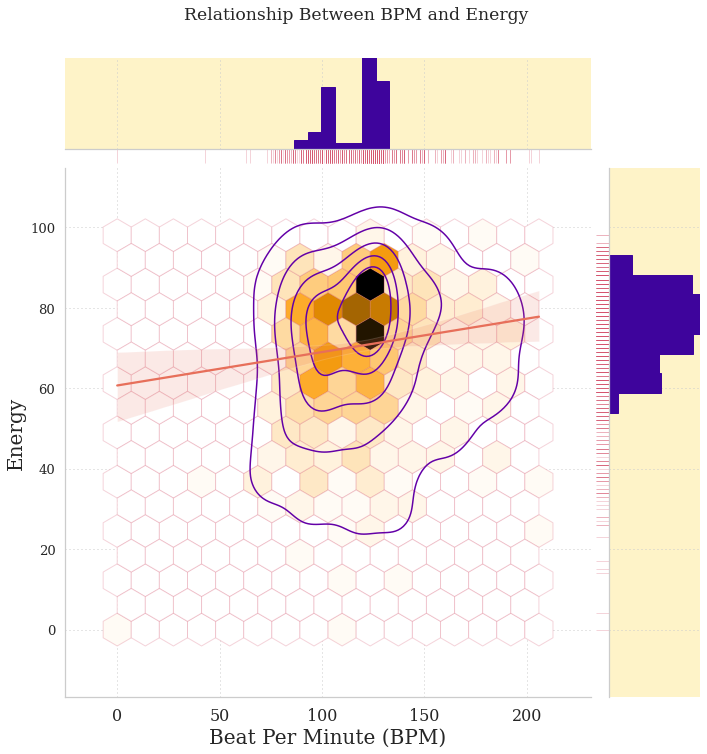

The correlation between bpm and energy is 0.12617006494310268


In [15]:
# Create a new DataFrame with just the bmp and nrgy columns
# drop any rows with missing values (even though there are none)
all_top_songs_bmp_and_energy = all_top_songs[['bpm', 'nrgy']].dropna()

# To enlarge or zoom in on the plot, use the following.
# Remove outlier values that are not within the quantile range.
# TODO: I think this could be shortened by using the query() method instead.
# Something like: all_top_songs_bmp_and_energy.query('bpm > 0 and bpm < 200 and nrgy > 0 and nrgy < 100')
# all_top_songs_bmp_and_energy = all_top_songs_bmp_and_energy[
#     (all_top_songs_bmp_and_energy['bpm'] > all_top_songs_bmp_and_energy['bpm'].quantile(0.05)) &
#     (all_top_songs_bmp_and_energy['bpm'] < all_top_songs_bmp_and_energy['bpm'].quantile(0.95)) &
#     (all_top_songs_bmp_and_energy['nrgy'] > all_top_songs_bmp_and_energy['nrgy'].quantile(0.05)) &
#     (all_top_songs_bmp_and_energy['nrgy'] < all_top_songs_bmp_and_energy['nrgy'].quantile(0.95))
# ]

# Plot the relationship between bpm and energy
g = sns.jointplot(
    x=all_top_songs_bmp_and_energy.bpm,
    y=all_top_songs_bmp_and_energy.nrgy,
    kind="hex",
    color=palette[8],
    height=10,
    joint_kws={
        'gridsize':15, # Smaller values create bigger hexagons
    },
)

# Make the bins on top and right of the plot a different color
g.ax_marg_x.set_facecolor(transparent_palette[9])
g.ax_marg_y.set_facecolor(transparent_palette[9])

# Make the top and right bin/bar faces a different color
plt.setp(g.ax_marg_x.patches, color=palette[0])
plt.setp(g.ax_marg_y.patches, color=palette[0])

# Make the hex grid visible
g.ax_joint.collections[0].set_color(transparent_palette[5])

# Combine a few other kinds of plots on top of the JoinGrid
# type(g)
g.plot_joint(sns.kdeplot, zorder=1, levels=6, color=palette[1])
g.plot_joint(sns.regplot, ax=g.ax_joint, scatter=False, color=palette[6])
g.plot_marginals(sns.rugplot, height=-.15, clip_on=False, color=transparent_palette[5])

# Set title and labels
plt.suptitle('Relationship Between BPM and Energy', y=1.05)
plt.xlabel('Beat Per Minute (BPM)')
plt.ylabel('Energy')
plt.show()

# NOTE: This plot might look a little wacky but I wanted to explore styling 
# a jointplot and trying different kinds of plots combined on top of each other.
# Plus I think seeing the hex grid makes it a little more visually interesting.

# Cross check the correlation
# TODO: Need to add note on how to interpret this value.
corr_bpm_nrgy_value = all_top_songs_bmp_and_energy.bpm.corr(all_top_songs_bmp_and_energy.nrgy)
print(f'The correlation between bpm and energy is {corr_bpm_nrgy_value}')

### 7. Which genre has the highest energy score?

Data Fields Used:

* top genre = the genre of the track
* nrgy = energy, the higher the value the more energetic the song

Here I group each genres songs and sum the energy scores in each genre. I then sort based on the energy score with highest value first and plot the top 10 genres in a horizontal bar chart. The horizontal bar chart while listing the genre names on the left y axis for easier reading. It shows the ranking from highest to lowest which leads to the answer of "Dance Pop" being the genre with the highest energy score.

Note: These results are similar to those in question 3: What is the most popular genre of music in the dataset?

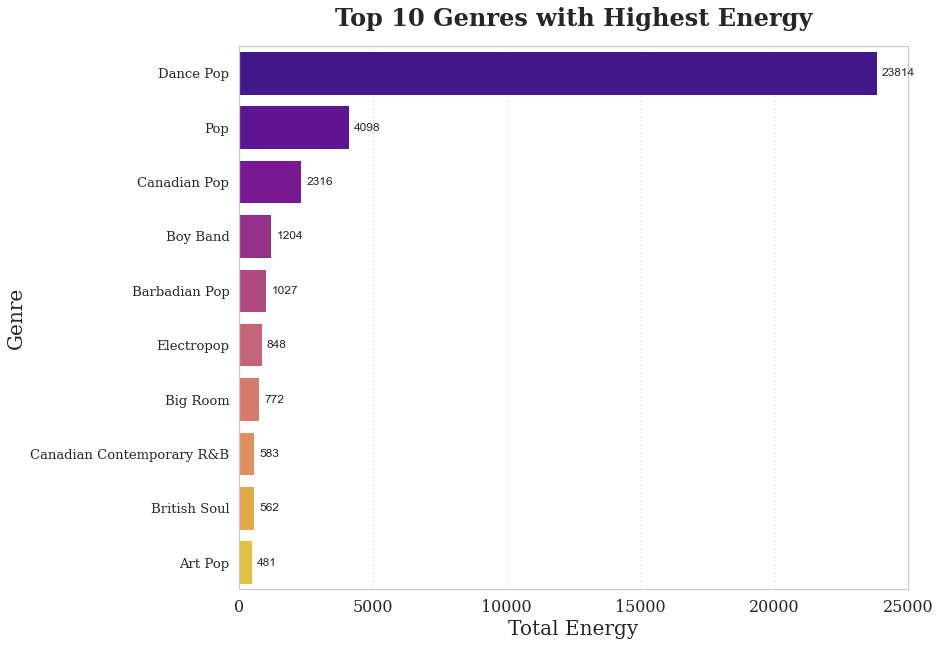

In [16]:
top_10_genres_by_energy = all_top_songs.groupby("top genre")["nrgy"].sum().sort_values(ascending=False).head(10)

# Make index values uppercase so labels are easier to read
top_10_genres_by_energy.index = top_10_genres_by_energy.index.str.title()

ax = sns.barplot(
    x=top_10_genres_by_energy.values, 
    y=top_10_genres_by_energy.index,
    orient="h", 
    palette="plasma",
)

# Label each bar
for b in ax.patches:
  height = b.get_height() # height of each horizontal bar is the same
  width = b.get_width() # width of bar is the value of the bar
  # adding text to each bar
  ax.text(
    x = width + 200, # x-coordinate position of data label, padded 3 to right of bar
    y = b.get_y() + (height / 2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center', # sets vertical alignment (va) to center
    fontsize=12, # Make font size smaller so it fits better
    family='sans-serif', # Looks a little cleaner for small font sizes
  )

# Add a title and labels
plt.title('Top 10 Genres with Highest Energy')
plt.xlabel('Total Energy')
plt.ylabel('Genre')
plt.show()

## Extra Analysis

### 1. What percentage of songs may have been recorded live? (Consider anything above 50 in the live column to be recorded live)

Data Fields Used:

* live = the higher the value the more likely the song is a live recording

Here I get the number of songs that have a `live` score above 50, then divide it by the total number of songs. Then I multiply it by 100 to get the percentage.

The result is 2.99% of songs were recorded live

In [17]:
percentage_of_songs_recorded_live = all_top_songs[all_top_songs['live'] > 50].shape[0] / all_top_songs.shape[0] * 100
print(f'{percentage_of_songs_recorded_live:.2f}% of songs were recorded live')

2.99% of songs were recorded live


### 2. What percentage of songs were acoustic? (Consider anything above 50 in the acoustic column to be acoustic)

Data Fields Used:

* acous = acousticness, the higher the value the more acoustic the song is

Here I'm getting the total number of songs that are above 50 in the `acous` column, then dividing it by the total number of songs. Then I multiply the result it by 100 to get the percentage.

The result is 7.30% of songs were acoustic

In [18]:
percentage_of_acoustic_songs = all_top_songs[all_top_songs['acous'] > 50].shape[0] / all_top_songs.shape[0] * 100
print(f'{percentage_of_acoustic_songs:.2f}% of songs were acoustic')

7.30% of songs were acoustic


### 3. Which year's songs have the highest amount of spoken word in the song?

Data Fields Used:

* year = song's year in the billboard
* spch = speechiness, the higher the value the more spoken word the song contains

For each `year`, I plotted the total `spch` values for songs for that year. Using a line chart shows the trends as well as the highest year of 2015.

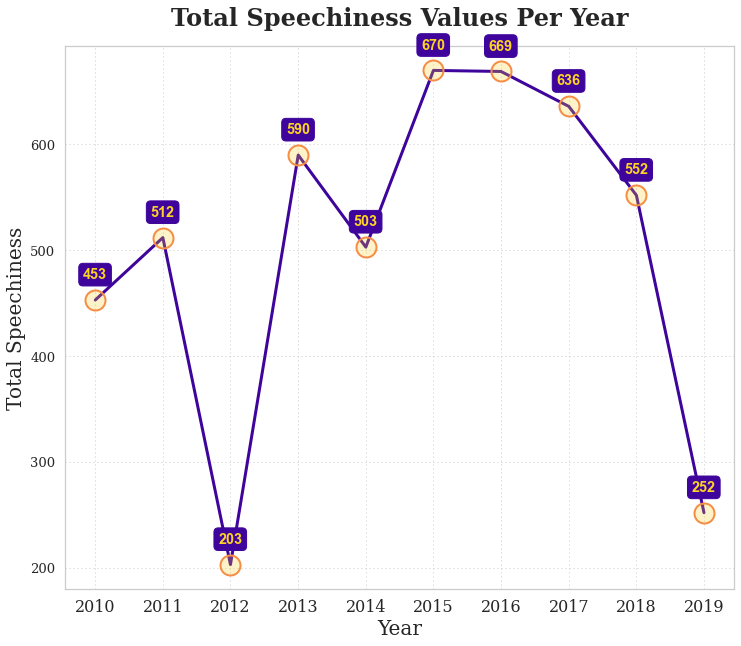

In [19]:
# Group songs by year and sum the total percentage of speechiness
# amount_of_spoken_words_per_year = all_top_songs.groupby("year")["spch"].sum().sort_values(ascending=False)
amount_of_speechiness_per_year = all_top_songs.groupby("year")["spch"].sum().reset_index()

# Rename the `spch` column to `total_spch` for clarity
amount_of_speechiness_per_year.rename(columns={'spch': 'total_spch'}, inplace=True)

# amounts_of_spoken_words_per_year.index
# Plot the data
# sns.set_style("whitegrid")
g = sns.lineplot(
    x=amount_of_speechiness_per_year.year,
    y=amount_of_speechiness_per_year.total_spch,
    color=palette[0],
    linewidth=3,
    marker='o',
    markersize=20, # Make the marker size larger
    markerfacecolor=transparent_palette[9], # Make the marker face color transparent
    markeredgecolor=palette[7], # Make the marker edge color the same as the line color
    markeredgewidth=2, # Make the marker edge width larger
)

# Label points on the plot
# REF: https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
for x, y in zip(amount_of_speechiness_per_year.year, amount_of_speechiness_per_year.total_spch):
  # Update x value (a date value) to move the label to the left or right
  x = x + pd.offsets.DateOffset(days=-1)
  plt.text(
    x, # x-coordinate position of data label position
    y+24, # y-coordinate position of data label position
    '{:.0f}'.format(y), # data label, formatted to ignore decimals
    color=palette[9], # set the text color
    fontweight='bold', # Make the font  bold
    family='sans-serif', # Looks a little cleaner for small font sizes
    ha="center", va="center", # set the horizontal and vertical alignment of the text
    bbox=dict(boxstyle="round",
          edgecolor=(palette[0]),
          facecolor=(palette[0]),
    )
  )
# REF: Types of markers https://matplotlib.org/stable/api/markers_api.html

# TODO: Try using a different marker to highlight the peak year
# REF: https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib#answer-61556930

# Add a title and labels
plt.title('Total Speechiness Values Per Year')
plt.xlabel('Year')
plt.ylabel('Total Speechiness')
plt.show()

# display(amount_of_speechiness_per_year.head(10))

# Print the year with the most spoken word
# print("The year with the most speechy songs is", amount_of_speechiness_per_year.index[0].year)